# 비지도 학습 소개

# 1.환경준비

## (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 샘플데이터 로딩 함수
from sklearn.datasets import make_blobs, make_moons

# 클러스터링을 위한 함수
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## (2) Sample Data 1

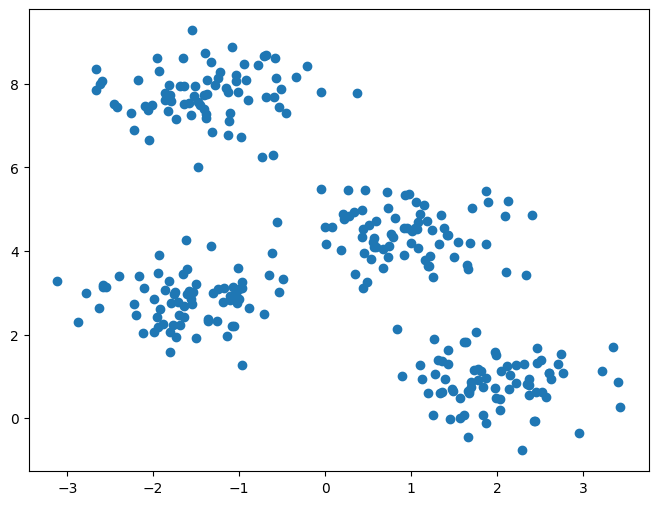

In [2]:
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (8,6))
plt.scatter(x['x1'], x['x2'])
plt.show()

# 2.k-means

## (1) k means 모델 만들기

### 1) 무작정 군집모델 만들기

In [3]:
# k means 학습
model = KMeans(n_clusters= 2, n_init = 'auto')
model.fit(x)

# 예측
pred = model.predict(x)
print(pred)

[1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1
 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 1]


In [4]:
# feature + pred + y 붙여 놓고 비교해 봅시다.
pred = pd.DataFrame(pred, columns = ['predicted'])
result = pd.concat([x, pred, y], axis = 1)
result.head()

,x1,x2,predicted,shape
0,0.836857,2.136359,1,1
1,-1.413658,7.409623,0,3
2,1.155213,5.099619,1,0
3,-1.018616,7.814915,0,3
4,1.271351,1.892542,1,1


### 2) 결과 시각화

* 모델의 중심 좌표 얻기

In [5]:
# k means 모델로 부터 클러스터의 평균 값들을 가져올 수 있습니다.
centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])
centers

,x1,x2
0,-1.334654,7.694427
1,0.452332,2.681056


* 시각화

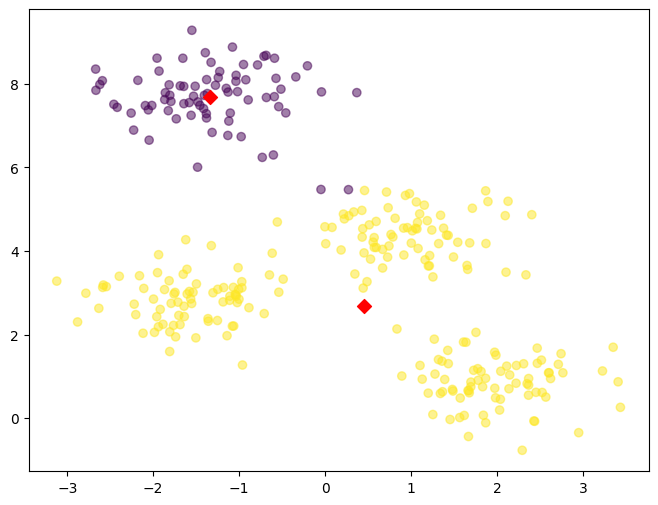

In [6]:
plt.figure(figsize = (8,6))
plt.scatter(result['x1'], result['x2'], c = result['predicted'], alpha=0.5)
plt.scatter(centers['x1'], centers['x2'], s=50, marker='D', c='r')
plt.show()

### 3) k 값에 따라 모델을 생성하고 그래프 그리기 함수

In [7]:
def k_means_plot(x, y, k) :
    # 모델 생성
    model = KMeans(n_clusters= k, n_init = 'auto')
    model.fit(x)
    pred = model.predict(x)

    # 군집 결과와 원본 데이터 합치기(concat)
    pred = pd.DataFrame(pred, columns = ['predicted'])
    result = pd.concat([x, pred, y], axis = 1)

    # 중앙(평균) 값 뽑기
    centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])

    # 그래프 그리기
    plt.figure(figsize = (8,6))
    plt.scatter(result['x1'],result['x2'],c=result['predicted'],alpha=0.5)
    plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
    plt.grid()
    plt.show()

## (2) 적절한 K 값 찾기

### 1) k 값 조절

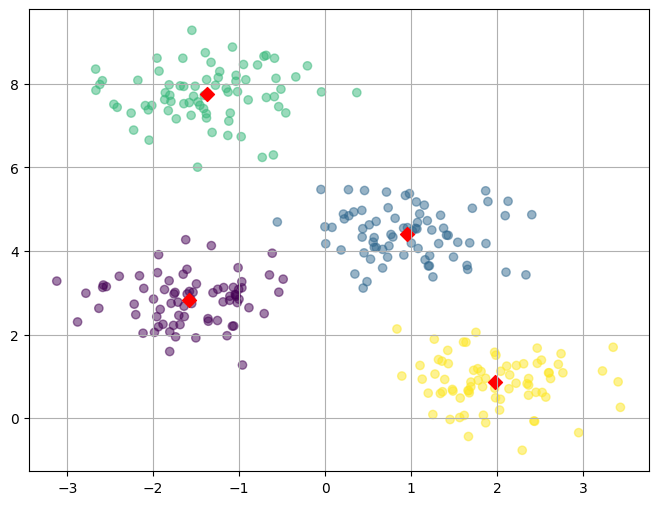

In [16]:
# k 값을 1~8까지 조절해 봅시다.
k_means_plot(x, y, k = 4)

### 2) 적정한 k값 찾기
* 눈으로 먼저 보니까 몇개로 군집화 할지 보이지만, 실전에서는 보고 판단할 수 없습니다.
* 그러면 군집의 개수를 어떻게 고를 수 있을까요?

* k means 모델을 생성하게 되면 inertia 값을 확인할 수 있습니다.

In [17]:
model.inertia_

1190.7823593643443

* k를 증가시켜가면서 inertia 구하기

In [18]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1, 10)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 'auto')
    model.fit(x)
    inertias.append(model.inertia_)

* 그래프 그리기

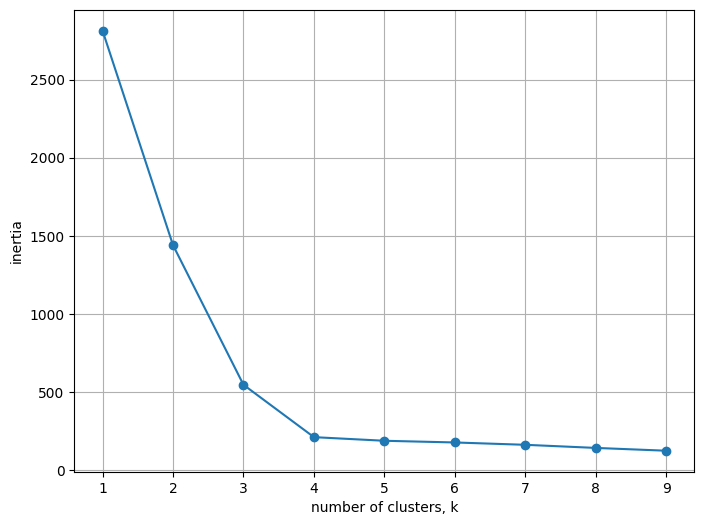

In [19]:
# Plot k vs inertias
plt.figure(figsize = (8, 6))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

* 위 결과로 부터 적절한 k 값을 정해 봅시다.

In [ ]:
# 4

## (3) k-means 실습
* 다음 준비된 데이터에 대해서
    * k 값을 1 부터 20까지 늘려가면서 inertia 값을 저장하고
    * 그래프를 그려 최적의 k값을 찾고
    * 모델을 생성하여 시각화 해 봅시다.

### 1) 데이터 준비

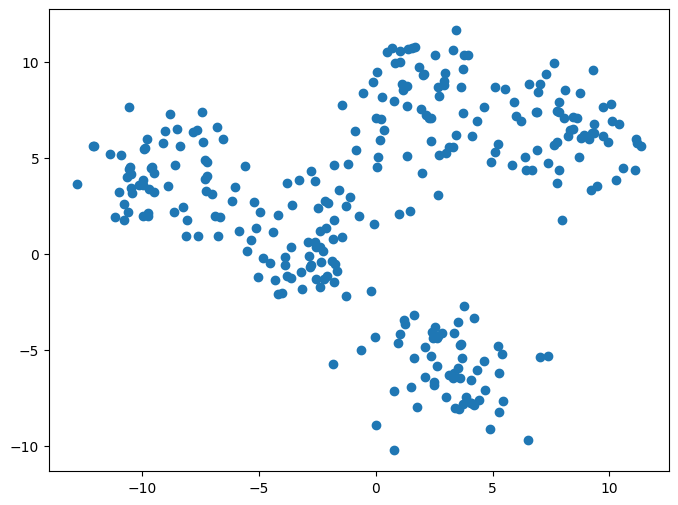

In [20]:
x, y = make_blobs(n_samples=300, centers=5, cluster_std=1.8, random_state=20)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (8,6))
plt.scatter(x['x1'], x['x2'])
plt.show()

### 2) k를 늘려가며 inertia 값 저장

In [22]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1,10)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, algorithm='auto')
    model.fit(x)
    inertias.append(model.inertia_)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 

### 3) 그래프 그리기

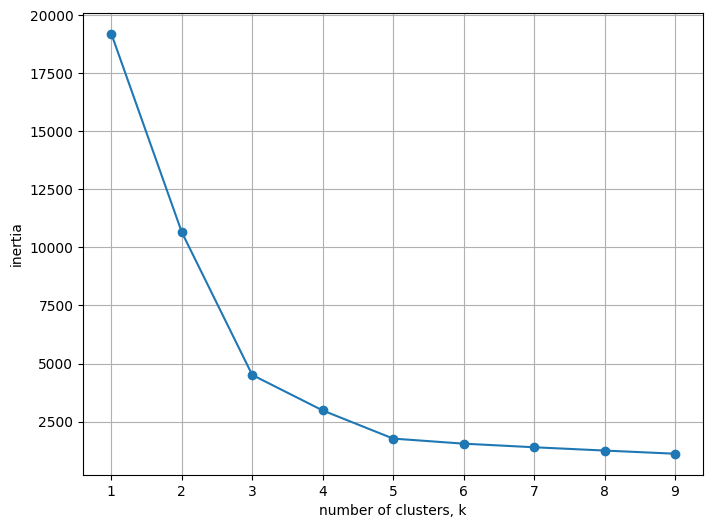

In [23]:
# Plot k vs inertias
plt.figure(figsize = (8, 6))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

### 4) 최적의 k 값으로 모델 생성 및 시각화

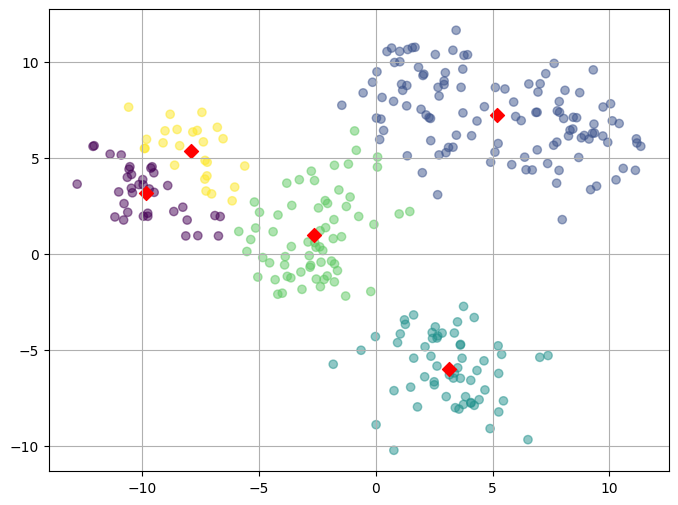

In [24]:
k_means_plot(x, y, k=5)

## (3) K-means 한계

### 1) Sample Data 2

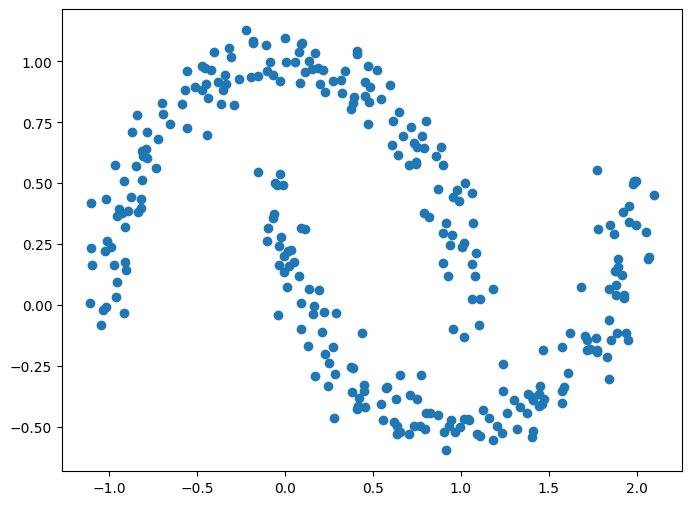

In [25]:
x, y = make_moons(n_samples = 300, noise = .08, random_state=2)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (8,6))
plt.scatter(x['x1'], x['x2'])
plt.show()

### 2) k means 모델 만들기
* 군집을 몇개로 하면 좋을까요?

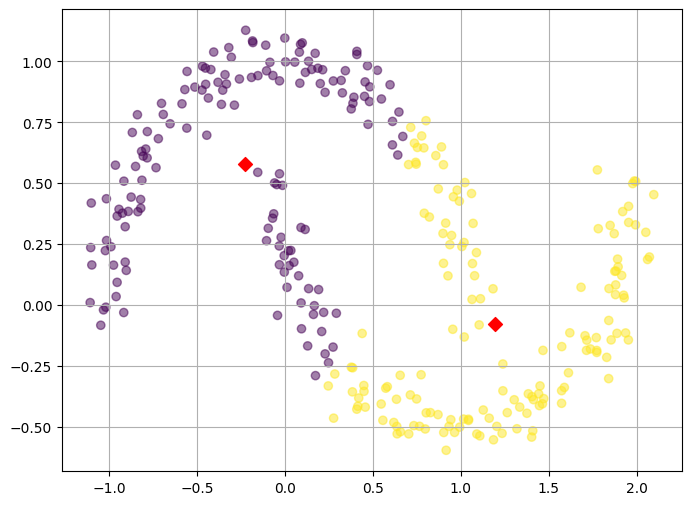

In [26]:
k_means_plot(x, y, k = 2)

### 3) inertia를 이용하여 k값 찾기

In [27]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1, 15)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 'auto')
    model.fit(x)
    inertias.append(model.inertia_)

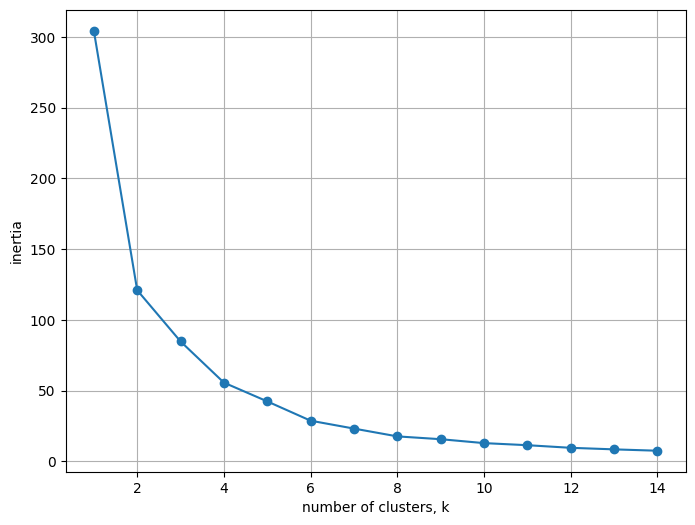

In [28]:
# Plot k vs inertias
plt.figure(figsize = (8,6))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

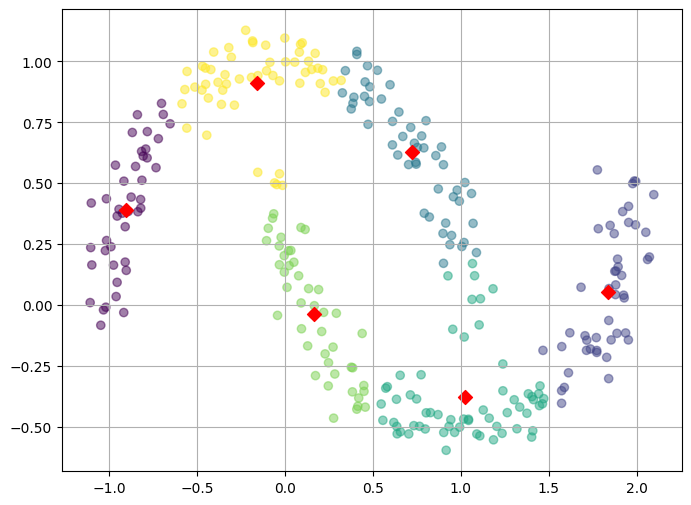

In [29]:
# 적절한 k값으로 모델을 생성해 봅시다.
k_means_plot(x, y, k = 6)

* 우리가 기대하는 바대로 모델이 생성되지 않았습니다.
* k means는 볼록한 덩어리 cluster 구분에서는 괜찮지만, 위와 같은 구조는 사용하기 곤란합니다.

# 3.DBSCAN

## (1) dbscan 모델 만들기

In [30]:
# DBSCAN 모델을 만들어 봅시다.
model = DBSCAN(eps=0.1, min_samples=3)
model.fit(x)

DBSCAN(eps=0.1, min_samples=3)

In [31]:
# fitting한 후에 모델의 labels_ 값이 찾아낸 군집 종류입니다.
clusters = model.labels_

In [32]:
# 군집 번호 중 -1은 이상치를 의미합니다.(어느 군집에도 포함 안되는 값들!)
clusters

array([ 0,  1,  2,  7,  3,  1,  4,  4,  2,  0,  9,  5,  3,  2,  5,  0,  0,
        6,  6,  0,  3,  4,  2, -1,  2,  0,  2,  2,  7,  8,  5,  2, -1,  2,
        2,  2,  2,  9,  0,  5, 10,  0,  3,  4,  9,  2,  5,  5,  0,  2,  2,
        8,  5,  2, 10,  4, -1,  2,  2,  2,  0, -1,  2,  0,  2, 11,  2, 10,
        5,  2,  0,  2,  2,  0,  4,  2, -1,  2,  6,  2,  0,  4,  8,  5,  2,
       11,  3,  2,  5,  0,  7,  2,  2,  0,  4,  2,  5, 11,  0, -1,  5, 11,
        8,  5, 10,  7,  2,  2,  0,  2,  5,  0, 12,  2,  4,  0,  0,  2,  2,
       12,  6,  4,  0,  0,  2,  5,  2,  2,  5,  8,  6,  8,  2,  2,  0,  2,
        4,  3,  9,  0,  2,  2,  9,  2,  0,  3, -1,  0,  6,  5,  7,  0,  7,
       -1,  2,  2,  4,  6,  5,  7,  7,  5,  4,  2,  8,  2, 11,  8,  9,  2,
        5,  2,  9,  1,  0,  7,  0,  0,  2,  9,  7,  0,  8,  6,  7,  5,  9,
        2,  3,  0,  2,  2,  0, 12,  3,  0,  2,  2,  2,  6,  0,  3,  2,  2,
        6,  4,  0,  2,  2,  2,  2,  2,  2,  6,  5,  0,  4,  2,  2,  7, -1,
       -1,  0,  8,  2,  6

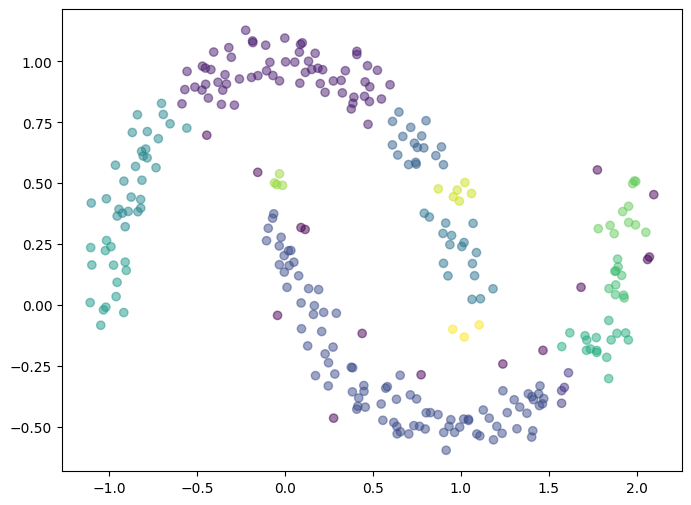

In [33]:
plt.figure(figsize = (8, 6))
plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
plt.show()

* eps를 적용하며 모델 생성하고 그래프 그리기

In [34]:
def dbscan_plot(x, y, eps) :
    model = DBSCAN(eps=eps, min_samples=3)
    model.fit(x)
    clusters = model.labels_
    plt.figure(figsize = (8,6))
    plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
    plt.grid()
    plt.show()

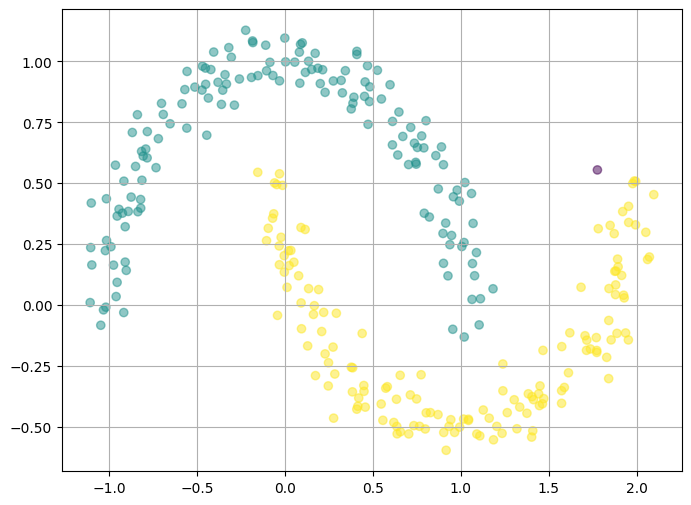

In [48]:
dbscan_plot(x, y, eps=0.2)

## (2) 적절한 eps 값 찾기
* 역시 눈으로 보면서 찾는 것은 실전에서는 거의 불가능합니다.
* DBSCAN에도 적절한 값을 찾는 방법이 있습니다.
    * 모든 점과 가까운 n개와 평균 거리 계산
    * 평균 거리순으로 정렬해서, 그래프 그리기
    * 평균 거리가 급격히 커지기 시작하는 지점 찾기


In [35]:
x.shape

(300, 2)

In [36]:
# 각점과 근처 3개 점과의 평균 거리
# NearestNeighbors은 거리계산할 때, 자기 자신을 포함하므로 n+1
n = 3
knnDist = NearestNeighbors(n_neighbors = n+1).fit(x)
distances, _ = knnDist.kneighbors(x)

In [37]:
distances.shape

(300, 4)

In [38]:
distances[:5]

array([[0.        , 0.04860997, 0.05841896, 0.07888097],
       [0.        , 0.06445744, 0.08308109, 0.11389914],
       [0.        , 0.04117563, 0.05322804, 0.09380361],
       [0.        , 0.07280464, 0.10804769, 0.11389914],
       [0.        , 0.02427068, 0.03684996, 0.05306427]])

In [39]:
# 평균 거리 계산
dist = np.mean(distances[:,1:], axis = 1)

# 정렬
dist = np.sort(dist)

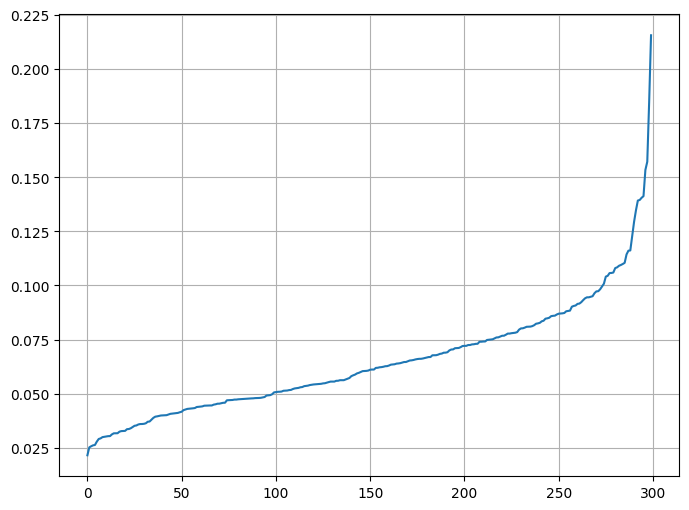

In [40]:
# 그래프 그리기
plt.figure(figsize = (8,6))
plt.plot(dist)
plt.grid()
plt.show()

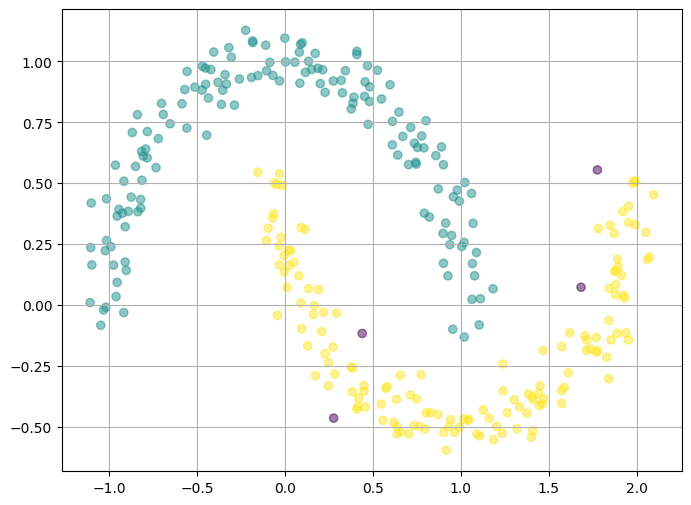

In [41]:
# 찾아낸 eps 값을 대입시켜 봅시다.

epsilon = 0.13
dbscan_plot(x,y, eps = epsilon)

## (3) DBSCAN 실습

* 다음 준비된 데이터에 대해서
    * 적절한 eps값 찾기
    * 모델을 생성하여 시각화 해 봅시다.

### 1) 데이터 준비

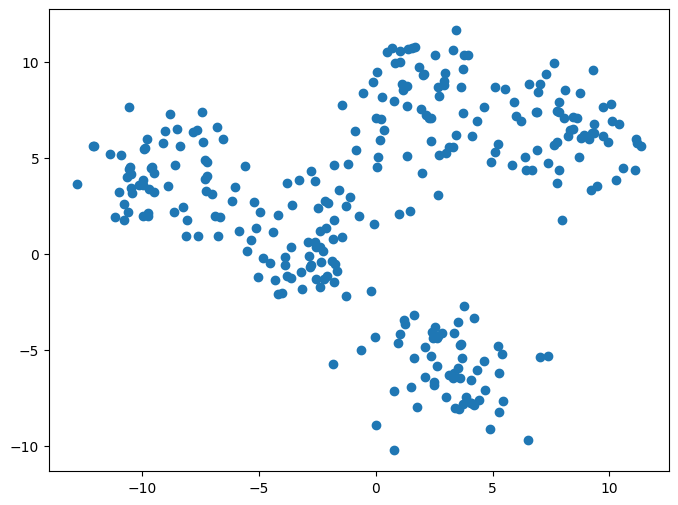

In [50]:
x, y = make_blobs(n_samples=300, centers=5, cluster_std=1.8, random_state=20)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (8,6))
plt.scatter(x['x1'], x['x2'])
plt.show()

### 2) 적절한 eps 찾기

In [51]:
# 각점과 근처 3개 점과의 평균 거리
# NearestNeighbors은 거리계산할 때, 자기 자신을 포함하므로 n+1

n = 3
knnDist = NearestNeighbors(n_neighbors = n+1).fit(x)
distances, _ = knnDist.kneighbors(x)

In [52]:
# 평균 거리 계산
dist = np.mean(distances[:,1:], axis = 1)

# 정렬
dist = np.sort(dist)

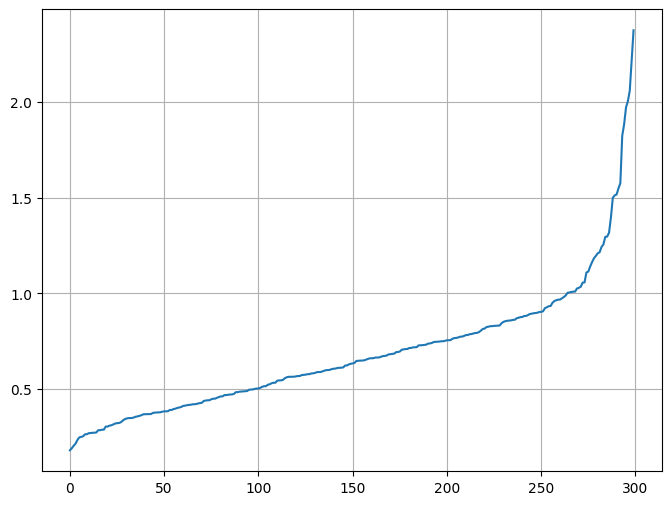

In [53]:
# 그래프 그리기
plt.figure(figsize = (8,6))
plt.plot(dist)
plt.grid()
plt.show()

### 3) DBSCAN 모델 생성

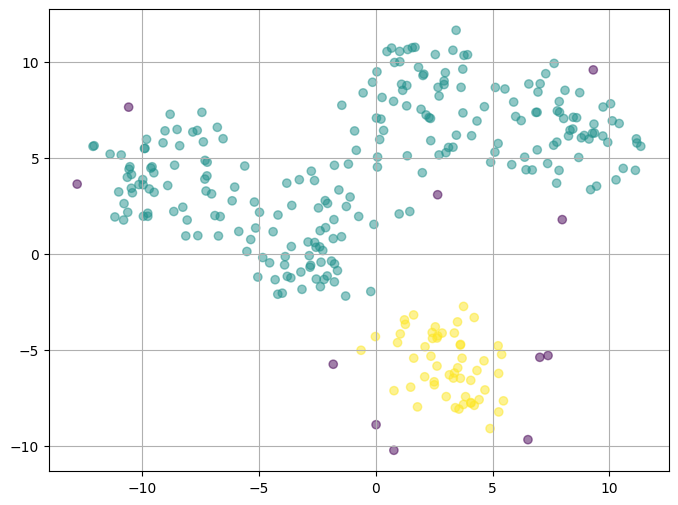

In [56]:
epsilon = 1.3
dbscan_plot(x,y, eps = epsilon)